In [101]:
from diffusers import DDPMScheduler, DDIMScheduler
import torch
from torchvision.transforms.functional import to_pil_image, pil_to_tensor
from diffusers.utils import make_image_grid
from src.dataset.vitonhd import VITONHDDataset

In [105]:
w, h = 768, 1024
viton_dataset = VITONHDDataset(
    '../datasets/vitonhd/',
    use_trainset=True,
    height=h,
    width=w,
)
img_512 = to_pil_image(viton_dataset[0]['original_image'], mode='RGB').resize((48, 64))
# img = to_pil_image(viton_dataset[0]['original_image'], mode='RGB').resize((96, 128))

In [106]:
scheduler = DDPMScheduler.from_pretrained('stable-diffusion-v1-5/stable-diffusion-inpainting', subfolder='scheduler',)

device = 'cuda:0'
img_tensor = pil_to_tensor(img).to(dtype=torch.float16)
T = scheduler.config.num_train_timesteps

timesteps = torch.randint(0, T, (1,)).long()
noise = torch.randn_like(img_tensor)
noised_image = scheduler.add_noise(img_tensor, noise, torch.tensor(999))

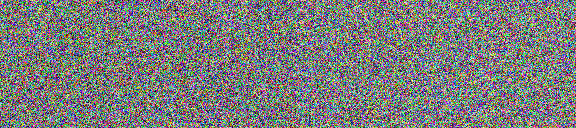

In [104]:
ts = [500, 600, 700, 800, 900, 999]
noised_imgs = []
for t in ts:
    noisy_image = scheduler.add_noise(img_tensor, noise, torch.tensor(t))
    noisy_image = to_pil_image(noisy_image)
    noised_imgs.append(noisy_image)
make_image_grid(noised_imgs, 1, len(ts))

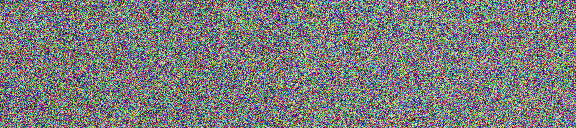

In [107]:
ts = [500, 600, 700, 800, 900, 999]
noised_imgs = []
for t in ts:
    noisy_image = scheduler.add_noise(img_tensor, noise, torch.tensor(t))
    noisy_image = to_pil_image(noisy_image)
    noised_imgs.append(noisy_image)
make_image_grid(noised_imgs, 1, len(ts))